## Task 2 / The Sparks Foundation


## **Linear Regression with Python Scikit Learn**


### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.linear regression task as it involves just two variables.

In [7]:
# Importing all libraries required in this notebook
import pandas as pd
from pandas import DataFrame
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

### Reading the data from link

In [8]:

url = "http://bit.ly/w-data"
student_data = pd.read_csv(url)
type(student_data)

pandas.core.frame.DataFrame

### Viewing the dataset

In [9]:
student_data.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
student_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### plot our data points on 2-D graph 
### find any relationship between the data 

In [11]:
x=DataFrame(student_data,columns=['Hours'])
y=DataFrame(student_data,columns=['Scores'])

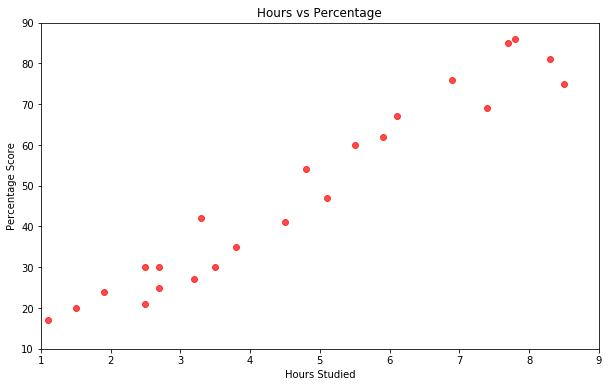

In [12]:
# Plotting the distribution of scores
plt.figure(figsize=(10,6))
plt.scatter(x,y,alpha=0.7,c='r')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.ylim(10,90)
plt.xlim(1,9)
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### Data Preparation 

In [13]:
student_data.corr().head()


,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [14]:
X = student_data.iloc[:, :-1].values  
y = student_data.iloc[:, 1].values  

#### Spliting data into Train data and Test data(80 & 20)

In [15]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### **Training the Algorithm**


In [16]:
from sklearn.linear_model import LinearRegression  
regression = LinearRegression()  
regression.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [17]:
regression.coef_

array([9.91065648])

In [18]:
regression.intercept_

2.018160041434683

###  Plotting the regression line for predict data

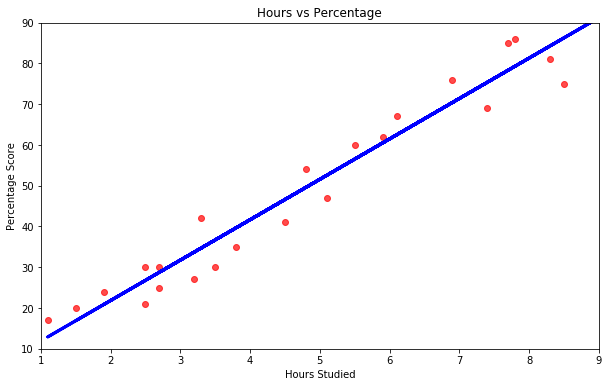

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(x,y,alpha=0.7,c='r')
plt.title('Hours vs Percentage')  
plt.plot(X,regression.predict(X),color='b',linewidth=3)
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.ylim(10,90)
plt.xlim(1,9)
plt.show()
#line = regressor.coef_*X+regressor.intercept_



### **Making Predictions**

In [20]:
print(X_test) # Testing data - In Hours
y_pred = regression.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


###  Comparing Actual vs Predicted

In [21]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Testing the data

In [22]:
hours = 9.25
own_pred = regression.predict(np.array([hours]).reshape(1,1))
print("Study Hours = {}".format(hours))
print("Predicted Grade = {}".format(own_pred[0]))

Study Hours = 9.25
Predicted Grade = 93.69173248737538


### **Evaluating the model**



In [23]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
